In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [79]:
# compute cost value
def compute_cost_val(x,y,w):
    P = len(y)
    cost = 0
    
    # run over all data points and weights and compute total error
    for p in range(P):
        x_p = x[p]
        y_p = y[p]
        cost += (w[0] + np.dot(x_p,w[1:]) - y_p)**2
    return cost

In [80]:
def compute_gradient(x,y,w):
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = np.array([1,x[p]])
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        temp = np.dot(x_p*x_p.T,w) - x_p*y_p
        grad+=2*temp
    return grad

In [81]:
# gradient descent loop
def grad_descent(x,y,alpha,K,w0):
    w = w0
    
    # create container to record weights
    whist = []
    
    # descent loop
    for k in range(K):
        # record current weight
        whist.append(w)
        
        # compute derivative
        grad = compute_gradient(x,y,w)
        
        # take descent step
        w = w - alpha*grad
        
    return whist

In [82]:
data = np.asarray(pd.read_csv('regr_linear_data.csv'))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

In [113]:
# inputs to gradient descent
w0 = 2*np.random.rand(2,1) - 1
alpha = 10**-3
K = 1000

# run gradient descent
whist = grad_descent(x,y,alpha,K,w0)

In [114]:
# compute the associated ccst function values
ghist = []
for w in whist:
    g = compute_cost_val(x,y,w)
    ghist.append(g)

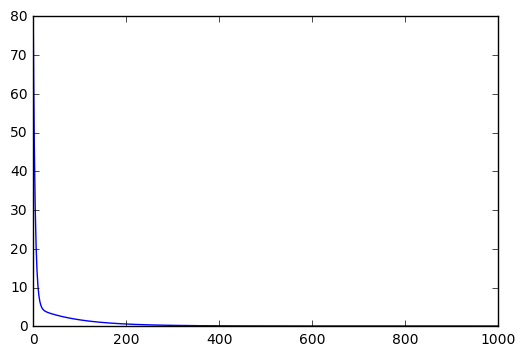

In [115]:
plt.plot(ghist)

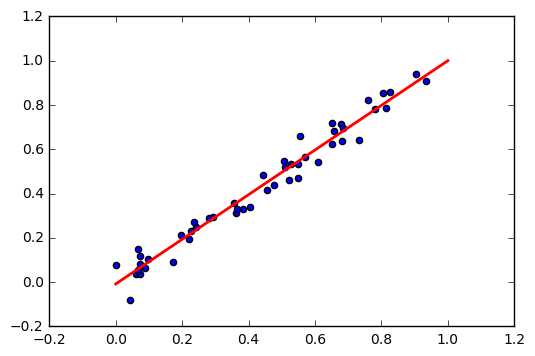

In [116]:
# now lets plot the points and line
plt.scatter(x,y)
s = np.linspace(0,1)
w = whist[-1]
t = w[0] + w[1]*s
plt.plot(s,t,c = 'r',linewidth = 2)

In [122]:
data = np.loadtxt('3d_reg_data.csv')
x1 = data[:,0]
x2 = data[:,1]
y = data[:,2]

<IPython.core.display.Javascript object>


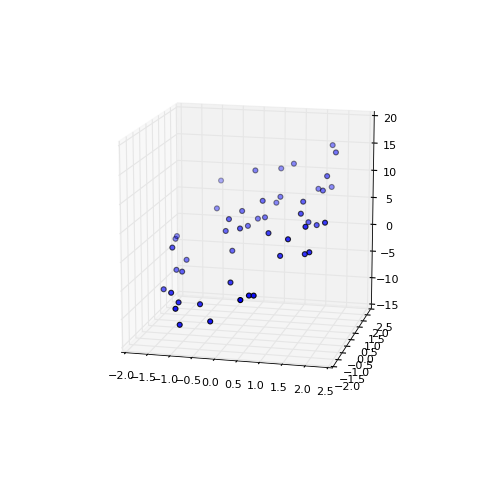

In [123]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# define figure
fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111,projection='3d')
ax1.scatter(x1,x2,y)